In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.copula.api import GaussianCopula

Generate synthetic data for three assets

In [2]:
np.random.seed(42)
n_samples = 1000

Simulate marginal distributions

In [10]:
stock_returns = np.random.normal(0.05, 0.15, n_samples)  # Mean 5%, StdDev 15%
bond_returns = np.random.normal(0.02, 0.05, n_samples)   # Mean 2%, StdDev 5%
commodity_returns = np.random.normal(0.03, 0.10, n_samples) # Mean 3%, StdDev 10%
data = np.vstack((stock_returns, bond_returns, commodity_returns)).T
print(data)

[[-0.23617113 -0.02317468 -0.01237597]
 [-0.07905775  0.01843983 -0.01534141]
 [-0.01204083  0.02090084 -0.14956432]
 ...
 [ 0.00195533  0.17564551 -0.09174038]
 [ 0.29650672  0.06040181  0.07679504]
 [ 0.10409718 -0.02240328 -0.08702807]]


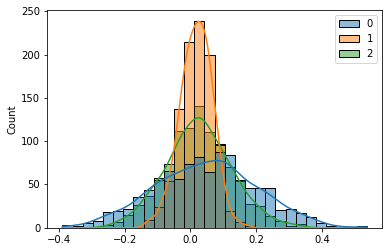

In [19]:
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.show()

Estimate the empirical marginal distributions

In [8]:
marginal_stock = stats.norm.fit(stock_returns)
marginal_bond = stats.norm.fit(bond_returns)
marginal_commodity = stats.norm.fit(commodity_returns)

In [21]:
marginal_stock

(0.05289980837334883, 0.14680893116210314)

Convert data to uniform margins using the fitted distributions

In [11]:
stock_cdf = stats.norm.cdf(stock_returns, *marginal_stock)
bond_cdf = stats.norm.cdf(bond_returns, *marginal_bond)
commodity_cdf = stats.norm.cdf(commodity_returns, *marginal_commodity)
uniform_data = np.vstack((stock_cdf, bond_cdf, commodity_cdf)).T
print(uniform_data)

[[0.02447492 0.1743322  0.33104117]
 [0.18436927 0.45923891 0.32017539]
 [0.3291187  0.47887366 0.03342344]
 ...
 [0.36429111 0.99886098 0.10666879]
 [0.95147702 0.77018347 0.6808675 ]
 [0.63635577 0.17834047 0.11575068]]


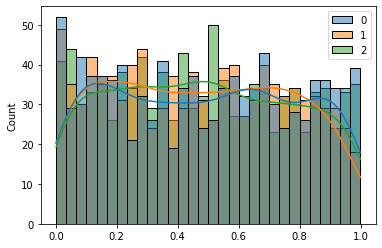

In [20]:
sns.histplot(uniform_data, bins=30, kde=True, color='blue', edgecolor='black')
plt.show()

Fit a Gaussian copula to the uniform data

In [22]:
corr = np.corrcoef(uniform_data.T)
corr

array([[ 1.        ,  0.00982832,  0.02558646],
       [ 0.00982832,  1.        , -0.02904111],
       [ 0.02558646, -0.02904111,  1.        ]])

Generate correlated uniform samples from the copula

In [25]:
copula = GaussianCopula(corr) # alternative is StudentTCopula
simulated_uniforms = copula.rvs(n_samples)
simulated_uniforms

array([[0.40265046, 0.08418935, 0.5875816 ],
       [0.10188849, 0.95987013, 0.23353731],
       [0.24906019, 0.24152393, 0.34911076],
       ...,
       [0.2204494 , 0.93849908, 0.31613509],
       [0.85315816, 0.71809296, 0.6680203 ],
       [0.48279122, 0.55348131, 0.89509604]])

Transform back to the original marginal distributions

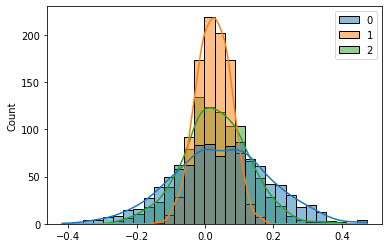

In [26]:
simulated_stock_returns = stats.norm.ppf(simulated_uniforms[:, 0], *marginal_stock)
simulated_bond_returns = stats.norm.ppf(simulated_uniforms[:, 1], *marginal_bond)
simulated_commodity_returns = stats.norm.ppf(simulated_uniforms[:, 2], *marginal_commodity)
simulated_data = np.vstack((simulated_stock_returns, simulated_bond_returns, simulated_commodity_returns)).T
sns.histplot(simulated_data, bins=30, kde=True, color='blue', edgecolor='black')
plt.show()

Calculate portfolio statistics

Expected Portfolio Return: 0.0341
Portfolio Risk (Standard Deviation): 0.0612


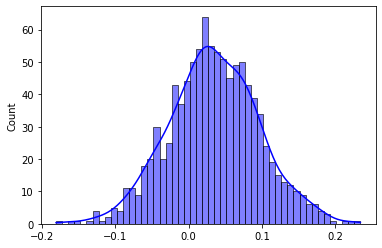

In [33]:
portfolio_returns = simulated_data.mean(axis=1)
expected_return = np.mean(portfolio_returns)
risk = np.std(portfolio_returns)

print(f"Expected Portfolio Return: {expected_return:.4f}")
print(f"Portfolio Risk (Standard Deviation): {risk:.4f}")
sns.histplot(portfolio_returns, bins=50, kde=True, color='blue', edgecolor='black')
plt.show()

# what if not a Copula-Based Simulation

Expected Portfolio Return: 0.0300
Portfolio Risk (Standard Deviation): 0.0644


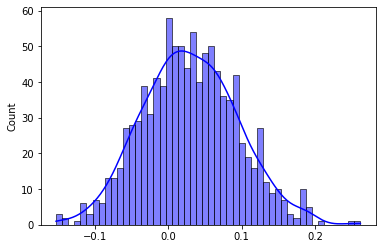

In [34]:
fake_returns = data.mean(axis=1)
fake_return = np.mean(fake_returns)
risk = np.std(fake_returns)

print(f"Expected Portfolio Return: {fake_return:.4f}")
print(f"Portfolio Risk (Standard Deviation): {risk:.4f}")
sns.histplot(fake_returns, bins=50, kde=True, color='blue', edgecolor='black')
plt.show()